In [1]:
# Will Hollingsworth, Colton Murray, Alexander Shiveley

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Getting our data into Python

We're going to start off with reading our given `insurance.csv` file; which is a little tricky considering it has a bunch of non-numeric information like the sex and region.
So we're also going to be stripping out the region column and headers, and converting the data into numbers that we can work with. The remaining columns of non-numeric information will be mapped to 0 or 1.

In [3]:
# Load the csv as a numpy array of strings, 
# because we need to strip out the region column, then convert sex and smoker to numbers
raw_data = np.loadtxt('insurance.csv', delimiter=',', dtype=str)

# Just putting "raw_data" here prints out said variable as it would in a normal console
raw_data

array([['age', 'sex', 'bmi', ..., 'smoker', 'region', 'charges'],
       ['19', 'female', '27.9', ..., 'yes', 'southwest', '16884.924'],
       ['18', 'male', '33.77', ..., 'no', 'southeast', '1725.5523'],
       ...,
       ['18', 'female', '36.85', ..., 'no', 'southeast', '1629.8335'],
       ['21', 'female', '25.8', ..., 'no', 'southwest', '2007.945'],
       ['61', 'female', '29.07', ..., 'yes', 'northwest', '29141.3603']],
      dtype='<U11')

In [4]:
# First lets delete the region column we don't need
# (see numpy's delete documentation)
stripped = np.delete(raw_data, [5], axis=1)

# We also need to remove the first row which is just the names of each column
stripped = np.delete(stripped, [0], axis=0)

In [5]:
# Now the columns for sex and smoker need to be mapped to 0 and 1
# The values in the lists for mapping map between the value at index i to the value i
sex_mapping = ['male', 'female']
smoker_mapping = ['no', 'yes']

# First define a function to apply the above mappings to a row
def apply_mapping(row):
    row[1] = sex_mapping.index(row[1])
    row[4] = smoker_mapping.index(row[4])
    
    return row

# Convert the necessary columns in each row using the above function
converted = np.apply_along_axis(apply_mapping, 1, stripped)

In [6]:
# Next lets convert the strings into usable numbers
clean_data = np.matrix(converted, dtype=float)

clean_data

matrix([[1.90000000e+01, 1.00000000e+00, 2.79000000e+01, 0.00000000e+00,
         1.00000000e+00, 1.68849240e+04],
        [1.80000000e+01, 0.00000000e+00, 3.37700000e+01, 1.00000000e+00,
         0.00000000e+00, 1.72555230e+03],
        [2.80000000e+01, 0.00000000e+00, 3.30000000e+01, 3.00000000e+00,
         0.00000000e+00, 4.44946200e+03],
        ...,
        [1.80000000e+01, 1.00000000e+00, 3.68500000e+01, 0.00000000e+00,
         0.00000000e+00, 1.62983350e+03],
        [2.10000000e+01, 1.00000000e+00, 2.58000000e+01, 0.00000000e+00,
         0.00000000e+00, 2.00794500e+03],
        [6.10000000e+01, 1.00000000e+00, 2.90700000e+01, 0.00000000e+00,
         1.00000000e+00, 2.91413603e+04]])

In [7]:
# Lets make a helper function to split up our X and Y matrices
def split_input_output(data):
    """
    Splits the input array into two seperate sets:
        * the feature values
        * the output value
        
    :returns: (tuple) the features are the first element, the outputs are the second
    """
    return np.delete(data, [data.shape[1] - 1], axis=1), data[:, -1]

In [8]:
# Test it out!
x, y = split_input_output(clean_data)

In [9]:
y

matrix([[16884.924 ],
        [ 1725.5523],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.3603]])

In [10]:
x

matrix([[19.  ,  1.  , 27.9 ,  0.  ,  1.  ],
        [18.  ,  0.  , 33.77,  1.  ,  0.  ],
        [28.  ,  0.  , 33.  ,  3.  ,  0.  ],
        ...,
        [18.  ,  1.  , 36.85,  0.  ,  0.  ],
        [21.  ,  1.  , 25.8 ,  0.  ,  0.  ],
        [61.  ,  1.  , 29.07,  0.  ,  1.  ]])

# Standardizing the data
The input data, X, needs to be standardized around the mean of each column.

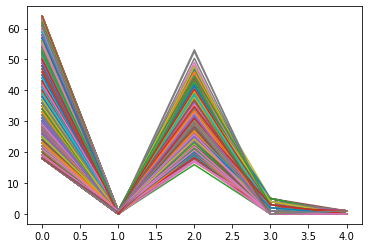

[[39.20702541  0.49476831 30.66339686  1.09491779  0.20478326]]
[[14.04470904  0.49997263  6.09590764  1.20504217  0.40354315]]


In [11]:
# Plot X to show that each column has different ranges
plt.plot(x.getT())
plt.show()

# First calculate the mean and standard deviation for each column
mean_x = x.mean(0)
std_x = x.std(0)

print(mean_x)
print(std_x)

[[-1.43876426  1.0105187  -0.45332    -0.90861367  1.97058663]
 [-1.50996545 -0.98959079  0.5096211  -0.07876719 -0.5074631 ]
 [-0.79795355 -0.98959079  0.38330685  1.58092576 -0.5074631 ]
 ...
 [-1.50996545  1.0105187   1.0148781  -0.90861367 -0.5074631 ]
 [-1.29636188  1.0105187  -0.79781341 -0.90861367 -0.5074631 ]
 [ 1.55168573  1.0105187  -0.26138796 -0.90861367  1.97058663]]

[[-1.85369076e-16  4.64667335e-17 -1.86904138e-16  2.72162296e-17
   2.14244832e-16]]

[[1. 1. 1. 1. 1.]]


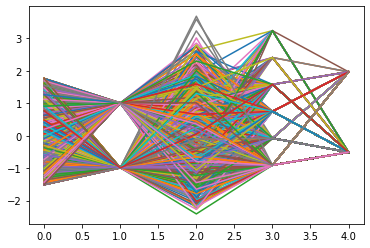

In [12]:
# Then define a function to standardize a row
def standardize_row(row):    
    return (row - mean_x) / std_x

# Standardize the entire matrix using the above function
standardized_x = np.apply_along_axis(standardize_row, 1, x)

print(standardized_x)

# To verify this new matrix, the mean of each column should be 0 and the standard deviation should be 1
# Values of small magnitude (<1e-15) are to be considered 0
print(f'\n{standardized_x.mean(0)}')
print(f'\n{standardized_x.std(0)}')

# Plot standardized X to show that each column has ranges around 0
plt.plot(standardized_x.getT())
plt.show()

# Selecting Training and Testing data

The data needs to be split about 50%/50% between training and testing data. So we need a convenient way to split up the data we now have into two sets.

In [13]:
def get_sets(data, split):
    """
    Convenience function that randomly selects a training and test set from the input data.
    
    :param data: (ndarray) the data you want to split
    :param split: (float) the percentage of the data you want to be TRAINING data
    
    :returns: (tuple) a tuple where the first element is the training set, and the second element is the test set
    """
    # Randomly shuffle the order from a copy of the data
    shuffled = data.copy()
    np.random.shuffle(shuffled)

    row_count = data.shape[0]

    # Stick in values of 1.0 at the beginning of the shuffled data, for the bias value
    bias = np.ones((row_count, 1))
    shuffled = np.hstack((bias, shuffled))

    # calc the number of samples, assumes the input samples are seperated by row
    training_count = round(row_count * split)
    
    training_set = shuffled[:training_count]
    test_set = shuffled[training_count:]
    
    return training_set, test_set

In [14]:
# Recombine the standardized input and output data before
standardized_data = np.hstack((standardized_x, y))

# Split our data into two sets, 50/50 split
training_set, test_set = get_sets(standardized_data, .50)

# Print the first 5 data points of each, for the fun of it
print(training_set[:5])
print('*' * 80)
print(test_set[:5])

# Also we can call `split_input_output` on these
training_x, training_y = split_input_output(training_set)
test_x, test_y = split_input_output(test_set)

[[ 1.00000000e+00 -3.70746407e-01  1.01051870e+00 -4.82848008e-01
  -9.08613667e-01 -5.07463099e-01  4.41515880e+03]
 [ 1.00000000e+00 -2.28344026e-01  1.01051870e+00 -1.21950152e-01
  -9.08613667e-01 -5.07463099e-01  4.88903680e+03]
 [ 1.00000000e+00  6.26070256e-01 -9.89590795e-01  9.85350089e-01
  -7.87671916e-02 -5.07463099e-01  2.84689190e+04]
 [ 1.00000000e+00  4.12466686e-01 -9.89590795e-01 -7.60176972e-02
  -7.87671916e-02 -5.07463099e-01  7.44105300e+03]
 [ 1.00000000e+00  4.83667876e-01 -9.89590795e-01  1.91712274e+00
   1.58092576e+00  1.97058663e+00  4.61511245e+04]]
********************************************************************************
[[ 1.00000000e+00  1.27661925e-01  1.01051870e+00  5.84987766e-02
  -9.08613667e-01 -5.07463099e-01  6.18532080e+03]
 [ 1.00000000e+00  5.54869066e-01  1.01051870e+00  8.75440288e-01
  -7.87671916e-02 -5.07463099e-01  8.55690700e+03]
 [ 1.00000000e+00 -5.84349978e-01  1.01051870e+00 -2.30219508e-01
  -7.87671916e-02 -5.07463099e-01

# Batch Algorithm
One method of gradient descent is using the batch algorithm with no regularization.

In [15]:
# Alex - May need to generalize some of the below methods when doing the other algorithms

In [16]:
# Initialize a weight vector with random values from -1000 to 1000 as the expected y values are large
weights = np.random.rand(training_x.shape[1], 1) * 1000

weights

array([[  1.81804111],
       [301.7181558 ],
       [494.90693266],
       [379.09375247],
       [828.88576181],
       [110.78800273]])

In [17]:
def gradient_mse(weight_vector):
    return 2 / training_x.shape[1] * training_x.getT() * (training_x * weight_vector - training_y)

def squared_sum(vec):    
    # Calculate the sum of the square differences
    sum_squares = sum(vec[i,0]**2 for i in range(vec.shape[0]))
    return sum_squares / vec.shape[0]

def batch_algorithm(weight_vector, learning_rate, min_error, max_epochs):
    # Run the algorithm for up to as many epochs allowed
    for epoch in range(max_epochs):
        # Calculate the gradient MSE and stop if the squared sum is below the threshold
        grad_mse = gradient_mse(weight_vector)   
        if squared_sum(grad_mse) <= min_error:
            print(f'Stopped after {epoch} epochs where the error is below threshold: {squared_sum(grad_mse)}')
            return weight_vector
        
        # Update the weight vector using the gradient MSE and learning rate
        weight_vector = weight_vector - learning_rate * grad_mse
        
    print(f'Stopped after reaching {max_epochs} epochs with error of: {squared_sum(grad_mse)}')
    return weight_vector   


In [18]:
trained_weights = batch_algorithm(weights, 0.001, 0.05, 100)
trained_weights

Stopped after 75 epochs where the error is below threshold: 0.03593478432179887


matrix([[13256.11031297],
        [ 3530.0517494 ],
        [  257.75596467],
        [ 2189.9476894 ],
        [  601.71632737],
        [ 9594.4905104 ]])

In [19]:
# Just "productizing" a plot function
def plot(hypothesis, test_features, test_output, title, labels):
    b = float(hypothesis[0,0])
    plt.figure(figsize=(15,3))

    for i in range(1, len(hypothesis)):
        x = test_features[:, i].flatten()
        y = test_output.flatten()

        m = float(hypothesis[i, 0])

        xh = np.arange(x.min(), x.max() + 1)
        yh = xh * m + b

        plt.subplot(150 + i)
        plt.plot(x,y,'bo', markersize=3)
        plt.plot(xh, yh, 'r--', linewidth=3)
        plt.xlabel(labels[i - 1])

    plt.suptitle(title)
    plt.show()

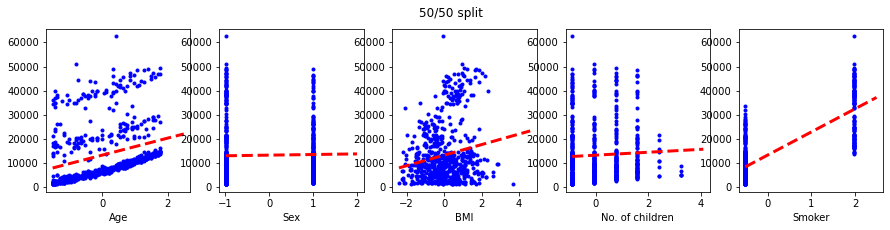

In [20]:
plot(trained_weights, test_x, test_y, "50/50 split", ["Age", "Sex", "BMI", "No. of children", "Smoker"])

# Alex - The plots need some cleaning up, maybe 3 on the first row and 2 on the second?
# Also, currently plotting against the standardized values. I assume we want to keep it like this?